In [21]:
import numpy as np # type: ignore
import pandas as pd # type: ignore
import os
import cv2 # type: ignore
import tensorflow as tf# type: ignore
from sklearn.model_selection import train_test_split# type: ignore
from keras.preprocessing.image import ImageDataGenerator# type: ignore
from tensorflow import keras# type: ignore
from keras.models import Sequential# type: ignore
from keras.layers import Dense, Dropout, Flatten# type: ignore
from keras.layers import Conv2D, MaxPooling2D# type: ignore
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image


In [22]:
early_leaf_spot = os.listdir("C:/Users/mrina/Desktop/groundnut leaf classification and detection/Groundnut_Leaf_dataset/train/early_leaf_spot_1")
early_rust = os.listdir("C:/Users/mrina/Desktop/groundnut leaf classification and detection/Groundnut_Leaf_dataset/train/early_rust_1")
healthy_leaf = os.listdir("C:/Users/mrina/Desktop/groundnut leaf classification and detection/Groundnut_Leaf_dataset/train/healthy_leaf_1")
late_leaf_spot = os.listdir("C:/Users/mrina/Desktop/groundnut leaf classification and detection/Groundnut_Leaf_dataset/train/late_leaf_spot_1")
nutrition_deficiency = os.listdir("C:/Users/mrina/Desktop/groundnut leaf classification and detection/Groundnut_Leaf_dataset/train/nutrition_deficiency_1")
rust = os.listdir("C:/Users/mrina/Desktop/groundnut leaf classification and detection/Groundnut_Leaf_dataset/train/rust_1")


In [23]:
print('Number of images:', len(early_leaf_spot))
print('Number of images:', len(early_rust))
print('Number of images:', len(healthy_leaf))
print('Number of images:',len(late_leaf_spot))
print('Number of images:',len(nutrition_deficiency))
print('Number of images:',len(rust))

Number of images: 1322
Number of images: 1065
Number of images: 1462
Number of images: 1491
Number of images: 1255
Number of images: 1315


In [24]:
early_leaf_spot_labels = [0]*1322
early_rust_labels = [1]*1065
healthy_leaf_labels = [2]*1462
late_leaf_spot_labels = [3]*1491
nutrition_deficiency_labels = [4]*1255
rust_labels = [5]*1315

In [25]:
labels= early_leaf_spot_labels + healthy_leaf_labels + late_leaf_spot_labels + nutrition_deficiency_labels + rust_labels + early_rust_labels

In [26]:
# convert images to numpy arrays+

early_leaf_spot_path= "C:/Users/mrina/Desktop/groundnut leaf classification and detection/Groundnut_Leaf_dataset/train/early_leaf_spot_1/"

data = []

for img_file in early_leaf_spot:

  image = Image.open(early_leaf_spot_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)


early_rust_path =  'C:/Users/mrina/Desktop/groundnut leaf classification and detection/Groundnut_Leaf_dataset/train/early_rust_1/'

for img_file in early_rust:

  image = Image.open(early_rust_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)


healthy_leaf_path = 'C:/Users/mrina/Desktop/groundnut leaf classification and detection/Groundnut_Leaf_dataset/train/healthy_leaf_1/'

for img_file in healthy_leaf:

  image = Image.open(healthy_leaf_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)


late_leaf_spot_path = 'C:/Users/mrina/Desktop/groundnut leaf classification and detection/Groundnut_Leaf_dataset/train/late_leaf_spot_1/'

for img_file in late_leaf_spot:

  image = Image.open(late_leaf_spot_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)

nutrition_deficiency_path = 'C:/Users/mrina/Desktop/groundnut leaf classification and detection/Groundnut_Leaf_dataset/train/nutrition_deficiency_1/' 


for img_file in nutrition_deficiency :

  image = Image.open(nutrition_deficiency_path  + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)


rust_path = 'C:/Users/mrina/Desktop/groundnut leaf classification and detection/Groundnut_Leaf_dataset/train/rust_1/' 


for img_file in rust :

  image = Image.open(rust_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)

In [27]:
X = np.array(data)
Y = np.array(labels)

In [28]:
print(len(X))
print(len(Y))
print(len(labels))

7910
7910
7910


In [29]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [30]:
X_train_scaled = X_train/255

X_test_scaled = X_test/255


In [31]:
print(len(X_test_scaled))
print(len(X_train_scaled))
print(len(Y_train))
print(len(Y_test))

1582
6328
6328
1582


In [32]:

model = keras.Sequential()

model.add(keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(128,128,3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Conv2D(16, kernel_size=(3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Flatten())


model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dropout(0.5))


model.add(keras.layers.Dense(6, activation='sigmoid'))

In [33]:
# compile the neural network
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

In [34]:
history = model.fit(X_train_scaled, Y_train, epochs=20)

Epoch 1/20


198/198 [==============================] - 37s 171ms/step - loss: 1.4903 - acc: 0.3587
Epoch 2/20
198/198 [==============================] - 34s 174ms/step - loss: 1.2146 - acc: 0.4976
Epoch 3/20
198/198 [==============================] - 35s 174ms/step - loss: 1.0534 - acc: 0.5664
Epoch 4/20
198/198 [==============================] - 35s 176ms/step - loss: 0.9365 - acc: 0.6179
Epoch 5/20
198/198 [==============================] - 31s 157ms/step - loss: 0.7890 - acc: 0.6808
Epoch 6/20
198/198 [==============================] - 22s 109ms/step - loss: 0.7177 - acc: 0.7108
Epoch 7/20
198/198 [==============================] - 12s 62ms/step - loss: 0.6050 - acc: 0.7601
Epoch 8/20
198/198 [==============================] - 12s 62ms/step - loss: 0.5346 - acc: 0.7882
Epoch 9/20
198/198 [==============================] - 13s 65ms/step - loss: 0.4542 - acc: 0.8168
Epoch 10/20
198/198 [==============================] - 12s 63ms/step - loss: 0.4385 - acc: 0.8341
Epoch 11/20
198/198 [

In [35]:
loss, accuracy = model.evaluate(X_test_scaled, Y_test)
print('Test Accuracy =', accuracy)

50/50 [==============================] - 1s 19ms/step - loss: 1.2322 - acc: 0.7332
Test Accuracy = 0.7332490682601929


In [36]:
y_pred = np.argmax(model.predict(X_test), axis=-1)
print(len(y_pred))

50/50 [==============================] - 1s 17ms/step
1582


In [37]:
from sklearn import metrics


print(metrics.classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.47      0.87      0.61       282
           1       0.50      0.98      0.66       197
           2       0.50      0.37      0.43       297
           3       0.33      0.26      0.29       291
           4       0.18      0.17      0.18       232
           5       0.56      0.02      0.03       283

    accuracy                           0.42      1582
   macro avg       0.42      0.45      0.37      1582
weighted avg       0.43      0.42      0.36      1582



[[246   3  13  14   2   4]
 [  0 194   2   0   1   0]
 [ 21 142 110  22   2   0]
 [155   3  47  76  10   0]
 [ 68   3  27  95  39   0]
 [ 31  45  20  24 158   5]]


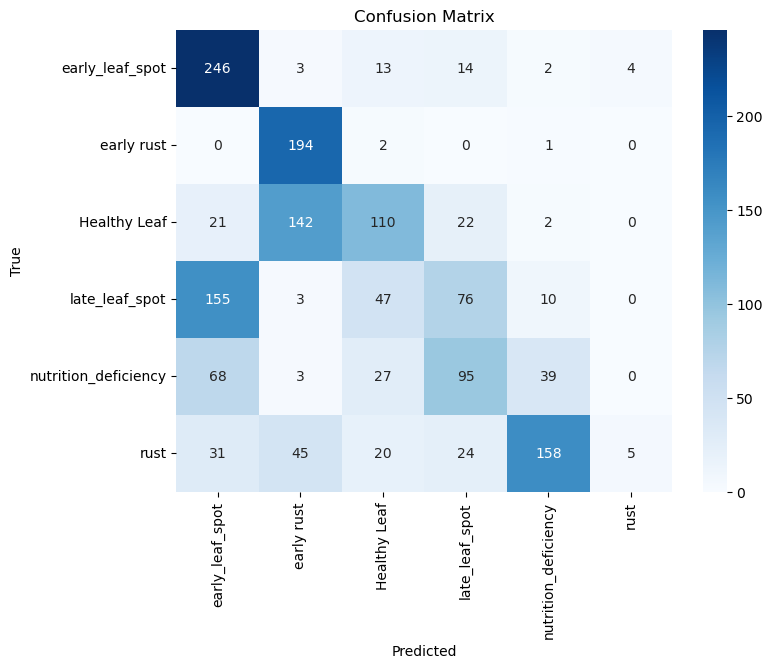

In [48]:
from sklearn.metrics import confusion_matrix,roc_curve,auc
import seaborn as sns
conf_matrix = confusion_matrix(Y_test, y_pred)
print(conf_matrix)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['early_leaf_spot','early rust', 'Healthy Leaf','late_leaf_spot','nutrition_deficiency','rust'], yticklabels=['early_leaf_spot','early rust', 'Healthy Leaf','late_leaf_spot','nutrition_deficiency','rust'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [39]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from itertools import cycle
y_score = model.predict(X_test_scaled)


50/50 [==============================] - 1s 15ms/step


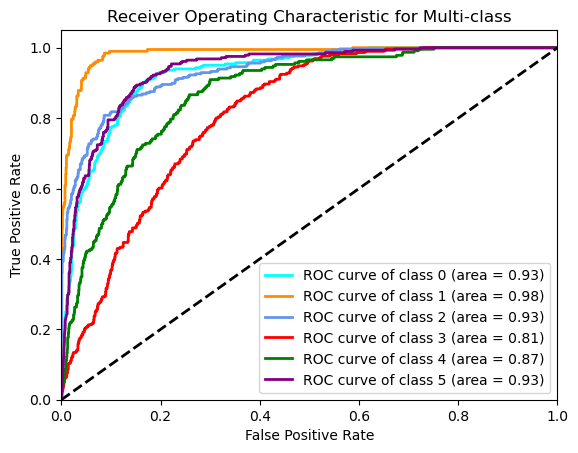

In [40]:
Y_test_binarized = label_binarize(Y_test, classes=[0, 1, 2, 3, 4, 5])
n_classes = Y_test_binarized.shape[1]

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(Y_test_binarized[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves
plt.figure()
colors = cycle(['aqua', 'darkorange', 'cornflowerblue', 'red', 'green', 'purple'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for Multi-class')
plt.legend(loc="lower right")
plt.show()

In [41]:
model.save('groundnut_leaf_classifier.h5')

c:\Users\mrina\Anaconda3\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [42]:
# load and evaluate a saved model
from numpy import loadtxt
from tensorflow.keras.models import load_model
 
# load model
model = load_model('groundnut_leaf_classifier.h5')

In [43]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 63, 63, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 16)        4624      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 30, 30, 16)        0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 14400)             0         
                                                                 
 dense (Dense)               (None, 128)               1

In [44]:
X = np.array(data)
Y = np.array(labels)

In [45]:
score = model.evaluate(X, Y, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], score[1]*100))

acc: 84.54%
